In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

items = pd.read_csv("Csv_limpios/steam_items_limpio.csv")
reviews = pd.read_csv("Csv_limpios/steam_reviews_limpio.csv")
steam_games = pd.read_csv("Csv_limpios/steam_games_limpio.csv")

EDA Steam Items

In [3]:
items

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,10,Counter-Strike,6.0,0.0
1,76561197970982479,277,20,Team Fortress Classic,0.0,0.0
2,76561197970982479,277,30,Day of Defeat,7.0,0.0
3,76561197970982479,277,40,Deathmatch Classic,0.0,0.0
4,76561197970982479,277,50,Half-Life: Opposing Force,0.0,0.0
...,...,...,...,...,...,...
5170010,76561198329548331,7,373330,All Is Dust,0.0,0.0
5170011,76561198329548331,7,388490,One Way To Die: Steam Edition,3.0,3.0
5170012,76561198329548331,7,521570,You Have 10 Seconds 2,4.0,4.0
5170013,76561198329548331,7,519140,Minds Eyes,3.0,3.0


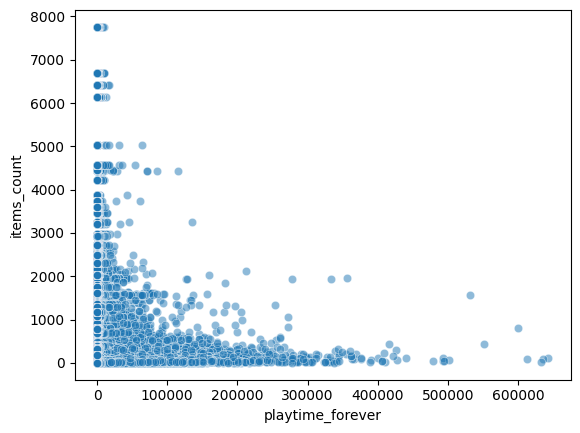

In [4]:
#Hacemos un scatterplot viendo la relacion que hay entre las horas y la cantidad de items
sns.scatterplot(data= items, x="playtime_forever", y="items_count", alpha=0.5)
plt.show()

In [5]:
"""
Podemos observar que no necesariamente mientras mas horas jugadas tenga alguien, no necesariamente tiene mas items.
Vemos que algunas personas con muchas horas tienen 0 items y otras que tienen 0 horas tienen muchos items, esto puede
ser porque algunos usuarios con 0 horas usan los items para comerciar y ganar plata
"""

'\nPodemos observar que no necesariamente mientras mas horas jugadas tenga alguien, no necesariamente tiene mas items.\nVemos que algunas personas con muchas horas tienen 0 items y otras que tienen 0 horas tienen muchos items, esto puede\nser porque algunos usuarios con 0 horas usan los items para comerciar y ganar plata\n'

In [15]:
#Agrupamos los juegos por su nombre y sumamos las horas totales
items_juegos_horas = items.groupby("item_name")["playtime_forever"].sum().reset_index()
items_juegos_horas

,item_name,playtime_forever
0,神明的一天世界(God's One Day World),6969.0
1,! That Bastard Is Trying To Steal Our Gold !,742.0
2,"""Glow Ball"" - The billiard puzzle game",21.0
3,#SelfieTennis,261.0
4,#SkiJump,0.0
...,...,...
10942,丛林守望者（Ranger of the jungle）,2255.0
10943,侠客风云传(Tale of Wuxia),19288.0
10944,大海战 Navy Field IV,126.0
10945,神楽道中記(KaguraDouchuuki),4337.0


In [23]:
#Juego con menos horas jugadas:
#Ordenamos por la cantidad de horas totales en orden ascendente y traemos el primer elemento
items_juegos_horas = items_juegos_horas.sort_values(by="playtime_forever", ascending=True)
print("Juego con menos horas: ", items_juegos_horas.head(1))

#Juego con mas horas jugadas
#Ordenamos por la cantidad de horas totales en orden descendente y traemos el primer elemento
items_juegos_horas = items_juegos_horas.sort_values(by="playtime_forever", ascending=False)
print("Juego con mas horas: ", items_juegos_horas.head(1))

Juego con menos horas:        item_name  playtime_forever
9107  The Abbey               0.0
Juego con mas horas:                               item_name  playtime_forever
2117  Counter-Strike: Global Offensive       785184267.0


Steam Games

In [18]:
steam_games

,genres,title,price,id,año
0,Action,Lost Summoner Kitty,4.99,761140,2018
1,Casual,Lost Summoner Kitty,4.99,761140,2018
2,Indie,Lost Summoner Kitty,4.99,761140,2018
3,Simulation,Lost Summoner Kitty,4.99,761140,2018
4,Strategy,Lost Summoner Kitty,4.99,761140,2018
...,...,...,...,...,...
72706,Indie,Russian Roads,1.99,610660,2018
72707,Racing,Russian Roads,1.99,610660,2018
72708,Simulation,Russian Roads,1.99,610660,2018
72709,Casual,EXIT 2 - Directions,4.99,658870,2017


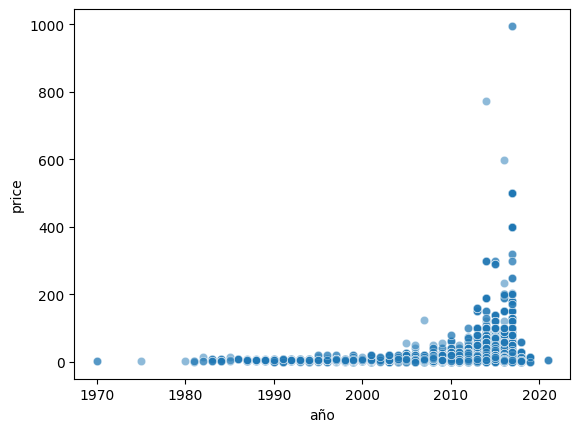

In [41]:
sns.scatterplot(data=steam_games, x="año", y="price", alpha=0.5)
plt.show()

In [ ]:
"""
Podemos ver que a medida que pasa el tiempo, el precio de los juegos tiende a subir
"""

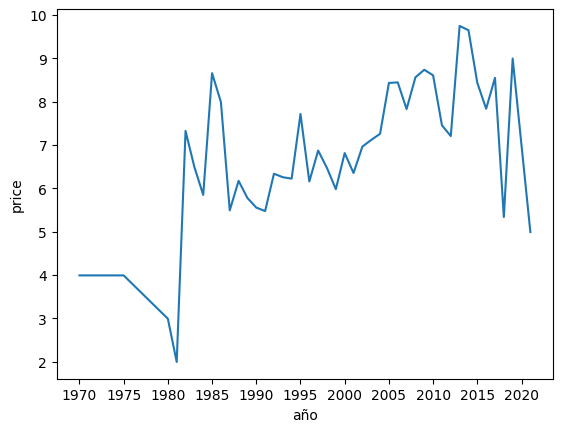

In [37]:
#Promedio de precios de los juegos de steam por año
steam_año_precio = steam_games.groupby("año")["price"].mean().reset_index()
steam_año_precio
sns.lineplot(data = steam_año_precio, x="año", y="price")
plt.xticks(range(steam_año_precio["año"].min(), steam_año_precio["año"].max() + 1, 5))
plt.show()

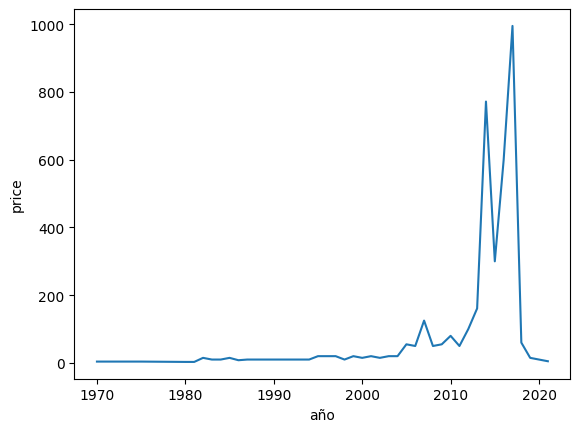

In [35]:
#El precio del juego mas caro por año
#Agrupamos por el año y el precio maximo
steam_año_precio = steam_games.groupby("año")["price"].max().reset_index()
#Hacemos un grafico de lineas con el año y el precio
sns.lineplot(data = steam_año_precio, x="año", y="price")
plt.show()

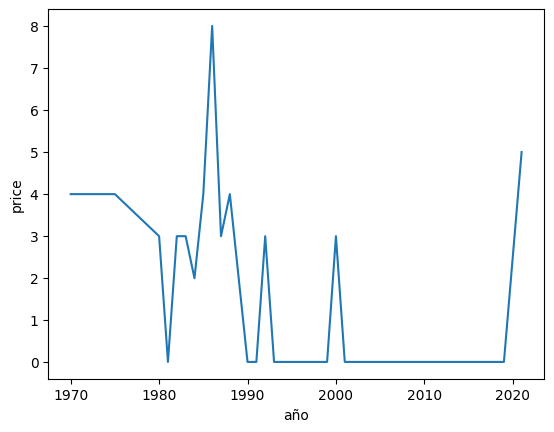

In [45]:
#El precio del juego mas barato por año
#Filtramos las filas que su precio sea 0
steam_año_precio = steam_año_precio[steam_año_precio["price"] != 0]
#Agrupamos por el año y el precio minimo
steam_año_precio = steam_games.groupby("año")["price"].min().reset_index()
#Hacemos un grafico de lineas con el año y el precio
sns.lineplot(data = steam_año_precio, x="año", y="price")
plt.show()

User reviews

In [46]:
reviews

,user_id,item_id,recommend,year,sentiment_analysis
0,76561197970982479,1250,1,2011.0,2
1,76561197970982479,22200,1,2011.0,2
2,76561197970982479,43110,1,2011.0,2
3,js41637,251610,1,2014.0,2
4,js41637,227300,1,2013.0,2
...,...,...,...,...,...
58426,Fuckfhaisjnsnsjakaka,70,1,2015.0,2
58427,3214213216,362890,1,2015.0,2
58428,ChrisCoroner,273110,1,2015.0,2
58429,CaptainAmericaCw,730,1,2015.0,1


In [77]:
ypositivo = (len(reviews[reviews["sentiment_analysis"] == 2]) / len(reviews)) * 100
yneutral = (len(reviews[reviews["sentiment_analysis"] == 1]) / len(reviews)) * 100
ynegativo = (len(reviews[reviews["sentiment_analysis"] == 0]) / len(reviews)) * 100

In [83]:
datos = pd.DataFrame()
datos["reseñas_positivas"] = pd.Series(ypositivo)
datos["reseñas_neutrales"] = pd.Series(yneutral)
datos["reseñas_negativas"] = pd.Series(ynegativo)
datos

,reseñas_positivas,reseñas_neutrales,reseñas_negativas
0,62.761206,20.184491,17.054303


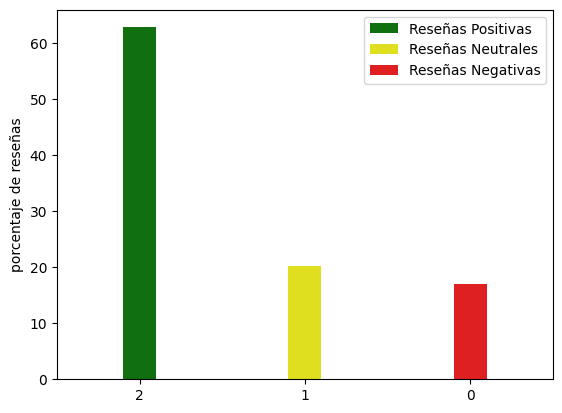

In [106]:
sns.barplot(x=2, y="reseñas_positivas", data=datos, color="green", label="Reseñas Positivas", width=0.2)
sns.barplot(x=1, y="reseñas_neutrales", data=datos, color="yellow", label="Reseñas Neutrales", width=0.2)
sns.barplot(x=0 , y="reseñas_negativas", data=datos, color="red", label="Reseñas Negativas", width=0.2)
plt.ylabel("porcentaje de reseñas")
plt.show()

In [ ]:
"""
Podemos ver que la mayoria de las reseñas son positivas, le siguen las neutrales y por ultimo las negativas
"""

In [ ]:
plt.subplot()